#  Transient Conduction square specimen having dimension $[0,1] \times [0,1]$

Given Transient Heat conduction in square domain having dimension $[0,1] \times [0,1]$ with temperature distribution T(x,y,t=0): {$20 C$ if $(x-0.5)^2 + (y-0.5)^2 < 0.2$, $40 C$ otherwise}

Method: Finite Difference Method <br>
Discretization of Heat Equation : The Explicit Method


The heat equation for $2^{nd}$ dimension is given by $$ \frac{\partial^2T}{\partial x^2}+ \frac{\partial^2T}{\partial y^2} = \frac{\partial T}{\alpha \times \partial t} $$ discretizing the problem in time and using forward difference approximations to the time derivative we obtain $$ {\frac{\partial T}{\partial t}}_{m,n} = \frac {T^{p+1}_{m,n} -T^{p}_{m,n}} {\Delta T} $$ where $ t = p \times \Delta t $ and the m, n subscripts may be used to designate the $x-locations$ and $y-locations$ of discrete nodal points.substituing and solving for the nodal temperature at the new $(p+1)$ time and assuming that $\Delta x = \Delta y$ it follows that $$
T^{p+1}_{m,n} = F_0(T^p_{m+1,n}+ T^p_{m-1,n}+T^p_{m,n+1}+T^p_{m,n-1})+(1-4F_0)T^p_{m,n} $$ where $F_0$ is finite difference number given as $$F_0 = \frac{\alpha \Delta t}{(\Delta x)^2}$$

Assumed : dimensions $[0,1] \times [0,1]$ is in meter and the test specimen is of copper with thermal diffusivity $\alpha = 117\times 10^{-6}$.<br>
Selecting the 11 nodes where as node 0 is at centre of circle made by the equation $(x-0.5)^2 + (y-0.5)^2 = 0.2$ and corresponding nodes 1, 2, 3, 4 ....10 are at scale of $\Delta x = 0.05m$ from origin to edge of square. since the radii of circle is $\sqrt{0.2}$. the node 9 lies outside of circle and node 10 lies at the boundry of square and the remaining nodes lies inside of the circe.
<br> selecting $F_0 = 0.1$ this gives $\Delta t = 2.13$  by symmetry the transfer of heat takes place radially in 1 dimension .thus for 1-Dimensional conduction in x . we have following equation for interior node $$T^{p+1}_m = F_0 (T^p_{m+1}+T^p_{m-1})+(1-2*F_0)T^p_m$$


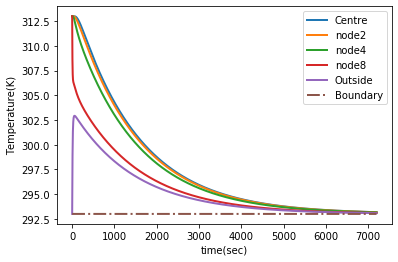

In [21]:
# importing external lbraries
import pylab as plt
import numpy as np

############ EXPLICIT METHOD ####################
# define F0 
#Fo must be less than 0.25 for stability
# let the material be copper with thermal diffusivity 117*10^(-6)
alpha = 117e-6
F0 = 0.1
# let del_x = 0.1 meter
del_x = 0.05 #meter
del_t = F0*del_x**2/alpha
##########
time_elapsed = 7200 # in seconds
# range of p required
p_max = int(time_elapsed/del_t)

def get_next_temp(list_of_prev_temp):
    """
    list_of_prev_temp: assumes object of type list , that contains
                       temperatures at node 0,1,2,3 nand 4 respectively
                       in kelvin as [T0,T1,T2,T3,T4]
    Returns list containing temperatures at respective nodes 
    resulting by unit increment of p                   
    """
    T0 = list_of_prev_temp[0] # temp at node 0
    T1 = list_of_prev_temp[1] # temp at node 1
    T2 = list_of_prev_temp[2] # temp at node 2
    T3 = list_of_prev_temp[3] # temp at node 3
    T4 = list_of_prev_temp[4] # temp at node 4
    T5 = list_of_prev_temp[5] # temp at node 5
    T6 = list_of_prev_temp[6] # temp at node 6
    T7 = list_of_prev_temp[7] # temp at node 7
    T8 = list_of_prev_temp[8] # temp at node 8
    T9 = list_of_prev_temp[9] # temp at node 9
    Tn0 = 2 * F0 * T1 + (1 - 2 * F0) * T0 # new temp at node 0
    Tn1 = F0 * (T2 + T0) + (1 - 2 * F0) * T1 # new temp at node 1 
    Tn2 = F0 * (T3 + T1) + (1 - 2 * F0) * T2 # new temp at node 2
    Tn3 = F0 * (T4 + T2) + (1 - 2 * F0) * T3 # new temp at node 3
    Tn4 = F0 * (T5 + T3) + (1 - 2 * F0) * T4 # new temp at node 4
    Tn5 = F0 * (T6 + T4) + (1 - 2 * F0) * T5
    Tn6 = F0 * (T7 + T5) + (1 - 2 * F0) * T6 
    Tn7 = F0 * (T8 + T6) + (1 - 2 * F0) * T7
    Tn8 = F0 * (T9 + T7) + (1 - 2 * F0) * T8
    Tn9 = F0 * (293 + T3) + (1 - 2 * F0) * T9 # new temp as node 9
    Tn10 = 293   # temperature remain fixed at this node
    return [Tn0, Tn1, Tn2, Tn3, Tn4, Tn5, Tn6, Tn7, Tn8, Tn9, Tn10]
    
# initial temperature list
init_temp = [313, 313, 313, 313, 313, 313, 313,313, 313, 293, 293] 
#####
current_temp = init_temp.copy()
node0, node1, node2, node3, node4 = [], [], [], [], []
node5, node6, node7, node8, node9, node10 = [], [], [], [], [], []
#####

for p in range(0, p_max):
    node0.append(current_temp[0])
    node1.append(current_temp[1])
    node2.append(current_temp[2])
    node3.append(current_temp[3])
    node4.append(current_temp[4])
    node5.append(current_temp[5])
    node6.append(current_temp[6])
    node7.append(current_temp[7])
    node8.append(current_temp[8])
    node9.append(current_temp[9])
    node10.append(current_temp[10])
    # calculate next temperatures and save to cyrrent temperature variable
    current_temp = get_next_temp(current_temp)

def plot_given(node,label,linestyle):
    """
    nodes_temp : contains list of tempertaures calulated for given time
    plot temp of nos vs time
                   
    """
#    name_of_graph = "nodal temperature plotted against time elapsed"
    plt.xlabel("time(sec)")
    plt.ylabel('Temperature(K)')
    X = np.arange(0,p_max)*del_t
#    plt.xticks([5,20,50,7200])
    plt.plot(X, node,linewidth = 2.0,linestyle = linestyle,label = label)
#    plt.title(name_of_graph)

plt.clf()    
plot_given(node0,label = 'Centre',linestyle ="solid")
plot_given(node2,label = 'node2',linestyle = "solid")
plot_given(node4,label = 'node4',linestyle =  "solid")
plot_given(node8,label = 'node8',linestyle =  "solid")
plot_given(node9,label = 'Outside',linestyle = "solid")
plot_given(node10,label = 'Boundary',linestyle ="dashdot")
plt.legend(loc = 'upper right')
   